In [55]:
import numpy as np
from skimage import draw
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
def get_gauss_filter(sigma=0, k=1):
    """Returns a gaussian filter mask."""
    if sigma == 0:
        mask = torch.ones(shape=(1,1), dtype=torch.float32)
    else:
        gauss = lambda x: torch.exp(-0.5 * x / sigma**2)
        w = 2 * k + 1
        coords = (torch.arange(w).view(w,1) - k)**2
        mask = gauss(coords + coords.T)
        mask = mask.to(dtype=torch.float32)
        mask = mask / mask[k,k]
    return mask

In [99]:
# choose parameters
batchsize = 2
w, h = 256, 256
sigma = 2
k = 2 * sigma
tau = 1
num_lines = 4

In [ ]:
# bulky way of drawing multiple lines
# rowscols = []
# for i in range(num_lines):
#     x0, x1 = np.random.randint(0,w, size=(2,))
#     y0, y1 = np.random.randint(0,h, size=(2,))
#     rowscols.append(torch.tensor(draw.line(x0, y0, x1, y1)))

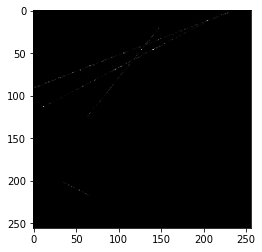

In [121]:
# elegant way of drawing multiple lines
xs = np.random.randint(0,w, size=(num_lines, 2))
ys = np.random.randint(0,h, size=(num_lines, 2))
rowscols = [torch.tensor(draw.line(x0, y0, x1, y1)) for (x0, x1), (y0, y1) in zip(xs, ys)]

rows, cols = torch.cat(rowscols, dim=1)
num_points, = rows.shape

# Create empty mask
mask = torch.zeros(h,w, dtype=torch.float32)

# Fill mask at line points with random positive values
mask[rows, cols] = (4*torch.randn(num_points))**2 + 1
plt.imshow(mask.numpy(), cmap='gray')

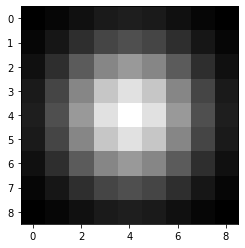

In [122]:
gauss_filter = get_gauss_filter(sigma=sigma,k=k)
plt.imshow(gauss_filter,cmap='gray')


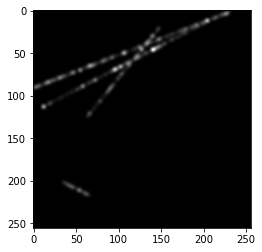

In [123]:
# Blurr the mask using the previously created gauss filter.
mask = torch.conv2d(mask.view(1,1,h,w), gauss_filter[None,None], padding=k)[0,0]
plt.imshow(mask.numpy(), cmap='gray')

In [124]:
mask.shape

torch.Size([256, 256])

In [125]:
# Apply a threshold tau to obtain a binary mask defining the irregular line.
mask = (mask >= tau)

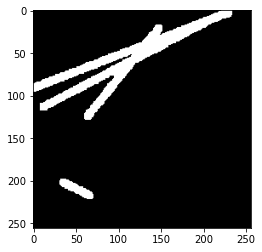

In [126]:
plt.imshow(mask.numpy(), cmap='gray')